<a href="https://colab.research.google.com/github/UmeshGayashan/EC7212-Take-Home-Assignment-2/blob/main/Task2_TakeHomeAssingment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

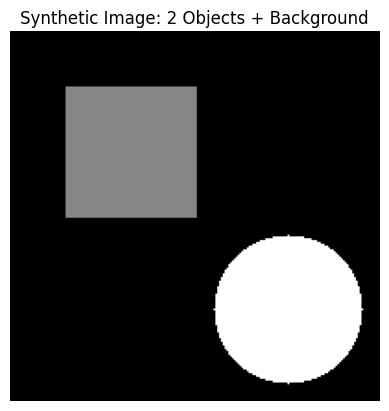

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create a black background
# 200x200 pixel image with all pixels set to 0 (black)
# dtype=np.uint8 means pixel values range 0 to 255
img = np.zeros((200, 200), dtype=np.uint8)

# Add a gray square (intensity 127)
# -1 means the rectangle is filled (not just the border)
cv2.rectangle(img, (30, 30), (100, 100), 127, -1)

# Add a white circle (intensity 240)
# (150, 150) - center, 40 - radius
cv2.circle(img, (150, 150), 40, 240, -1)

# Show the Image
plt.imshow(img, cmap='gray')
plt.title("Synthetic Image: 2 Objects + Background")
plt.axis('off')
plt.show()